# **Monitoring Pepper Health: Image Classification with Deep Learning**

This project was designed to monitor plant health in agriculture and detect diseased plants early.

We start our project by first downloading the necessary libraries.

In [ ]:
pip install datasets

In [90]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datasets import load_dataset


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report

import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")


# Data Loading and Visualization:
Load your dataset by specifying imagefolder and the directory of your dataset
in data_dir:




In [91]:
dataset = load_dataset("imagefolder", data_dir="/content/pepper1")

Resolving data files:   0%|          | 0/1628 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Our dataset consists of 2 columns and 1628 rows.
The labels are divided into two groups:

*   healthy(0)
*   unhealthy(1)







In [92]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1628
    })
})

In [93]:
dataset["train"][1]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 'label': 0}

### We divide the dataset into 80% training and 20% test
We converted our images into NumPy arrays and divided them into train and test data.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    np.array(dataset["train"]['image']),
    np.array(dataset["train"]['label']),
    test_size=0.2,
    random_state=42
)

Dataset successfully split into training, and test sets.





In [95]:
X_train.shape

(1302, 256, 256, 3)

In [96]:
X_test.shape

(326, 256, 256, 3)

In [97]:
y_train.shape

(1302,)

Here we can see that as mentioned above we have 1302 training image and 326 test image and all the images are 256 x 256 in size and have 3 color channels, so the images are color images. It also appears that only a single label is assigned to each image.

array([[[170, 165, 172],
        [173, 168, 175],
        [174, 169, 176],
        ...,
        [153, 148, 154],
        [154, 149, 155],
        [148, 143, 149]],

       [[176, 171, 178],
        [178, 173, 180],
        [180, 175, 182],
        ...,
        [160, 155, 161],
        [161, 156, 162],
        [156, 151, 157]],

       [[161, 156, 163],
        [165, 160, 167],
        [170, 165, 172],
        ...,
        [161, 156, 162],
        [160, 155, 161],
        [154, 149, 155]],

       ...,

       [[120, 105, 110],
        [137, 122, 127],
        [135, 120, 125],
        ...,
        [113,  98, 101],
        [116, 101, 104],
        [125, 110, 113]],

       [[134, 119, 124],
        [132, 117, 122],
        [112,  97, 102],
        ...,
        [117, 102, 105],
        [115, 100, 103],
        [121, 106, 109]],

       [[139, 124, 129],
        [149, 134, 139],
        [134, 119, 124],
        ...,
        [119, 104, 107],
        [114,  99, 102],
        [115, 100, 103]]], dtype=uint8)
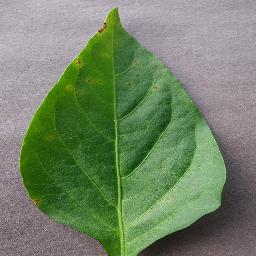

In [98]:
X_train[0]

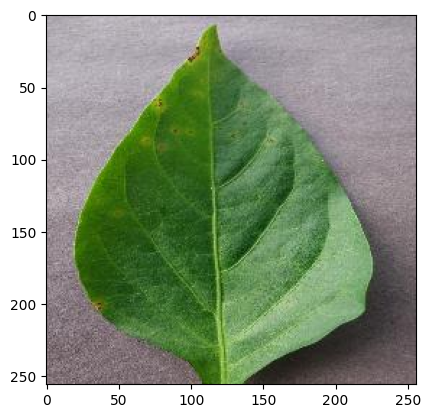

In [99]:
plt.figure()
plt.imshow(X_train[0])
#plt.colorbar()
plt.grid(False)
plt.show()

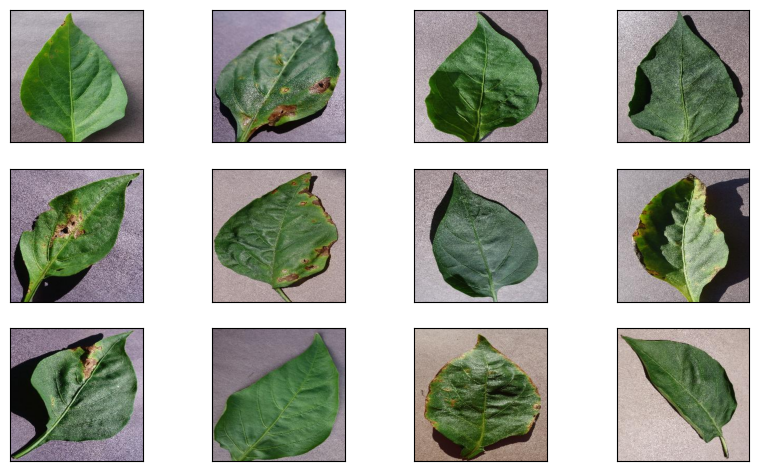

In [100]:
plt.figure(figsize=(10,10))

for i in range(12):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

Aand perform the normalization:


We normalized our data so that our model could work more efficiently. This involves us scaling each pixel value from a range of 0-255 to a range of 0-1.
Normalization allows the model to learn faster and more accurately. This reduces training time and increases accuracy.
By normalizing all images in the dataset, we ensured that the model processed each pixel value at the same scales. This helps the model produce consistent results.

In [101]:
# Reduce pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()


## **Creating a CNN**

In [102]:
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

In [103]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [104]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)


Epoch 1/5
41/41 [==============================] - 209s 5s/step - loss: 1.1098 - accuracy: 0.7642 - val_loss: 0.2528 - val_accuracy: 0.8926
Epoch 2/5
41/41 [==============================] - 220s 5s/step - loss: 0.2232 - accuracy: 0.9117 - val_loss: 0.2020 - val_accuracy: 0.9049
Epoch 3/5
41/41 [==============================] - 190s 5s/step - loss: 0.1398 - accuracy: 0.9485 - val_loss: 0.1604 - val_accuracy: 0.9233
Epoch 4/5
41/41 [==============================] - 156s 4s/step - loss: 0.0938 - accuracy: 0.9693 - val_loss: 0.1285 - val_accuracy: 0.9417
Epoch 5/5
41/41 [==============================] - 154s 4s/step - loss: 0.0501 - accuracy: 0.9885 - val_loss: 0.2510 - val_accuracy: 0.8957


Our model achieved high accuracy and low loss values ​​during the training process. The training accuracy was up to 98.85%, while the validation accuracy reached 94.17%.
In the later stages of training, some decline in the validation accuracy of the model was observed, which may indicate the beginning of overfitting.

Increasing the number of epochs can continue to improve the performance of the model. However, increasing the number of Epochs too much may cause the model to overfit the training data. 4 epochs seems ideal for this data.

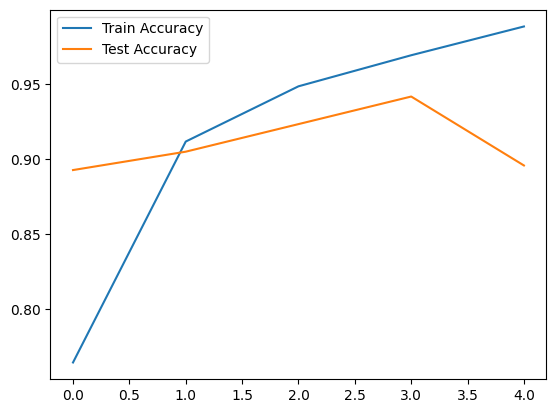

In [105]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Train Accuracy")
plt.plot(hist.history["val_accuracy"], label="Test Accuracy")
plt.legend()
plt.show()

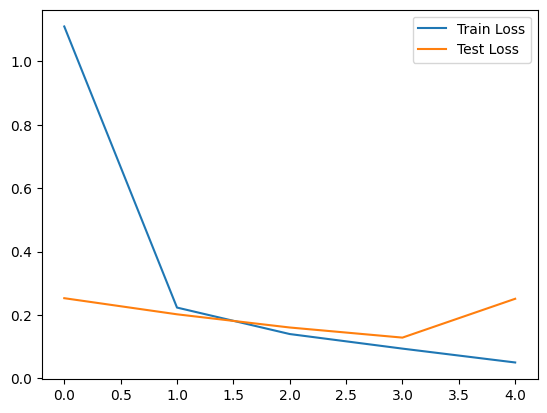

In [106]:
plt.figure()
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Test Loss")
plt.legend()
plt.show()

Training accuracy continuously increases with each epoch, indicating that the model learns the training data better and better.



*   Verification accuracy reached its peak in Epoch 3, but decreased slightly in Epoch 4. This may indicate that the model has overfitted the training data and started to overfit.
*   Based on this graph, it can be seen that the best verification accuracy is achieved in Epoch 3. In this case, the Epoch number may need to be optimized as signs of overfitting begin to appear at Epoch 4.



Now, evaluate the loss and accuracy of our model on the test data.


In [107]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

11/11 [==============================] - 10s 852ms/step - loss: 0.2510 - accuracy: 0.8957
Test Accuracy: 0.89570552110672


## **Creating a KNN**

In [110]:
# Reshape X_train to 2D
X_train = X_train.reshape(X_train.shape[0], -1)

In [111]:
# Reshape X_train to 2D
X_test = X_test.reshape(X_test.shape[0], -1)

In [112]:
# Fit the KNeighborsClassifier with reshaped data
knn = KNeighborsClassifier().fit(X_train, y_train)

In [113]:
X_test.shape

(326, 196608)

In [114]:
y_pred=knn.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [115]:
print(f'Accuracy: {acc:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')

Accuracy: 0.6319
F1 Score: 0.5714
Recall: 0.6319
Precision: 0.7071


While our model performs averagely in capturing positive examples (63.19% sensitivity), it correctly identifies the majority of samples it predicts as positive (70.71% precision).

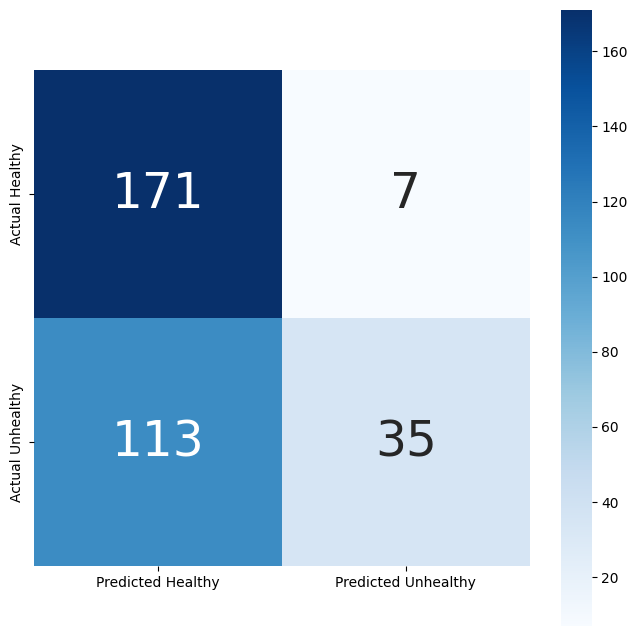

In [116]:
plt.figure(figsize=[8,8])
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['Predicted Healthy', 'Predicted Unhealthy'],
                yticklabels=['Actual Healthy', 'Actual Unhealthy'], annot=True,
                fmt='d', annot_kws={'fontsize':35}, cmap="Blues", square=True);

To evaluate the performance of our model, we analyzed the prediction results on validation data using confusion matrix.
According to the confusion matrix,

1.    our model correctly classified 171 healthy peppers, but incorrectly classified 7 healthy peppers as unhealthy.
2.   And, it correctly classified 35 unhealthy peppers, but incorrectly classified 113 healthy peppers as healthy.

This model appears to classify unhealthy peppers very poorly and generally classify the data as healthy.




## **Creating a Decision Tree**

In [117]:
dt=DecisionTreeClassifier().fit(X_train,y_train)

In [118]:
y_pred=dt.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [119]:
print(f'Accuracy: {acc:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')

Accuracy: 0.7331
F1 Score: 0.7300
Recall: 0.7331
Precision: 0.7344


We got a better result from KNN, but let's continue with different models.

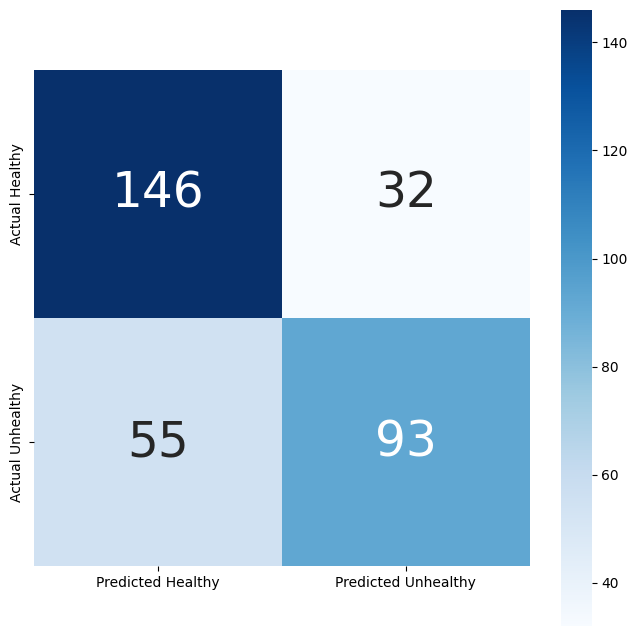

In [120]:
plt.figure(figsize=[8,8])
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['Predicted Healthy', 'Predicted Unhealthy'],
                yticklabels=['Actual Healthy', 'Actual Unhealthy'], annot=True,
                fmt='d', annot_kws={'fontsize':35}, cmap="Blues", square=True);

146 healthy peppers and 93 unhealthy peppers correctly classified. It started to show good results in classifying unhealthy peppers, but there is a decrease in healthy peppers.


## **Creating a Support Vector Machine**

In [121]:
y_pred=svc.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [122]:
print(f'Accuracy: {acc:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')

Accuracy: 0.9141
F1 Score: 0.9136
Recall: 0.9141
Precision: 0.9166




*   High Performance: our model's accuracy, precision, recall and F1 score values ​​are all over 90%. This indicates that our model performed quite well on our dataset and succeeded in the classification task.


*   No Imbalance Problem: High F1 score and recall values ​​indicate that our model provides balance between classes and can recognize both classes well.


*   Generalization Ability: High accuracy indicates that our model can generalize well on test data what it has learned from training data.




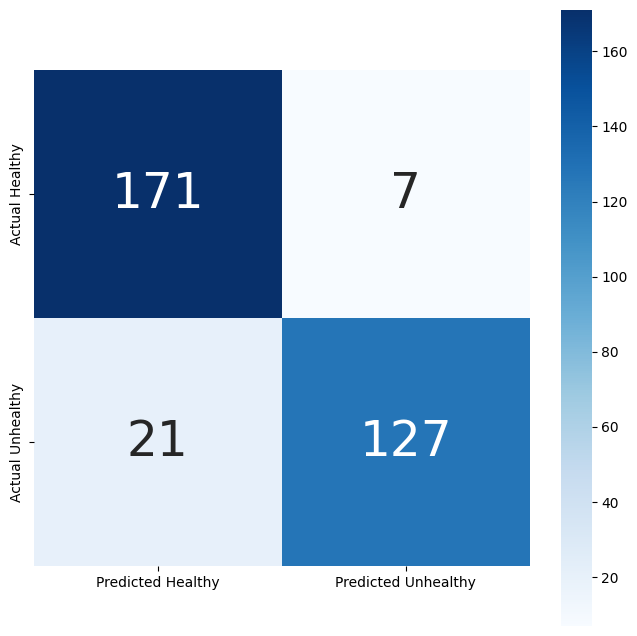

In [123]:
plt.figure(figsize=[8,8])
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['Predicted Healthy', 'Predicted Unhealthy'],
                yticklabels=['Actual Healthy', 'Actual Unhealthy'], annot=True,
                fmt='d', annot_kws={'fontsize':35}, cmap="Blues", square=True);

171 healthy peppers and 127 unhealthy peppers correctly classified. We achieved good results with both healthy and unhealthy peppers.

## **Creating a Random Forest classifier**

In [124]:
clf = RandomForestClassifier(n_estimators = 100)

# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

In [125]:
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [126]:
print(f'Accuracy: {acc:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')

Accuracy: 0.8865
F1 Score: 0.8860
Recall: 0.8865
Precision: 0.8876


Although this model gave very good results, we achieved the best result with SVC.

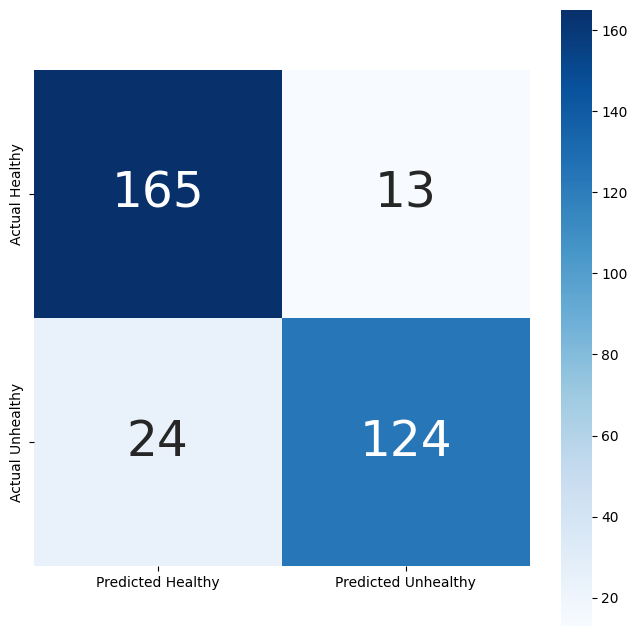

In [127]:
plt.figure(figsize=[8,8])
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['Predicted Healthy', 'Predicted Unhealthy'],
                yticklabels=['Actual Healthy', 'Actual Unhealthy'], annot=True,
                fmt='d', annot_kws={'fontsize':35}, cmap="Blues", square=True);

Judging by the results, the **Support Vector Machine model** has the potential to be used in disease diagnosis and improving product quality in the field of agriculture.

Let's look at the result of this model in more detail with an example.

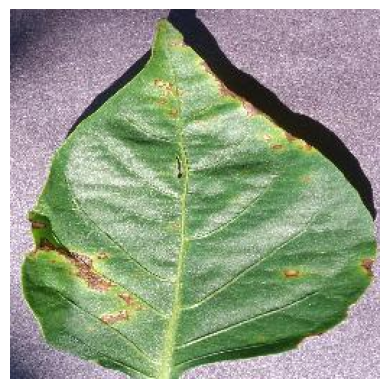

1/1 [==============================] - 0s 212ms/step
Original label is unhealthy and predicted label is unhealthy


In [128]:
# label mapping

labels = '''healthy unhealthy'''.split()

# select the image from our test dataset
image_number =2

# display the image
normalized_image = X_test[image_number]

# Görüntüyü orijinal aralığına döndürmek için 255 ile çarpalım
denormalized_image = (normalized_image * 255).astype(np.uint8)


# Reshape the image assuming it's 256x256 RGB
denormalized_image = denormalized_image.reshape((256, 256, 3))



# Görüntüyü görselleştirelim
plt.imshow(denormalized_image)
plt.axis('off')  # Eksenleri kapatalım
plt.show()

# load the image in an array
n = np.array(X_test[image_number])

# reshape it
p = n.reshape(1, 256, 256, 3)

# Get the prediction probabilities
prediction_probabilities = model.predict(p)


# Assuming your model outputs a single probability, extract it
predicted_probability = prediction_probabilities[0][0]

threshold = 0.5
predicted_label = 1 if predicted_probability > threshold else 0

predicted_label = labels[predicted_label]


# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

# **In Conclusion**
In this project, we developed a high-accuracy Support Vector Machine model that can determine the healthy and unhealthy status of pepper plants. The accuracy of the model is 91.41%, and this result shows that the model has achieved a certain level of success. The performance of the model can be improved with larger and more diverse data sets in the future. This study demonstrates the potential of artificial intelligence applications in agriculture.